# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
# Import the titanic dataset
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"

df_titanic = pd.read_csv(data_dir + "titanic.csv")

df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
#Filter data to only include passengers
df_titanicpass = df_titanic[(df_titanic["class"] == "1st") | (df_titanic["class"] == "2nd") | (df_titanic["class"] == "3rd")]

# Create the joint distribution using crosstab
joint_dist = pd.crosstab(df_titanicpass['class'], df_titanicpass['embarked'])

# Display the joint distribution
print("Joint Distribution:")
print(joint_dist)



Joint Distribution:
embarked  B    C    Q    S
class                     
1st       3  143    3  175
2nd       6   26    7  245
3rd       0  102  113  494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [7]:
# Calculate the conditional distribution (embarked|class) using axis names
conditional_dist1 = joint_dist.div(joint_dist.sum(axis='columns'), axis='index')

# Display the conditional distribution
print("Conditional Distribution (Embarked|Class):")
print(conditional_dist1)

Conditional Distribution (Embarked|Class):
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


In [8]:
### Calculate the conditional distribution (class|embarked) using axis names
conditional_dist2 = joint_dist.div(joint_dist.sum(axis='index'), axis='columns')

# Display the conditional distribution
print("Conditional Distribution (Class|Embarked):")
print(conditional_dist2)

Conditional Distribution (Class|Embarked):
embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481


In [ ]:
#What proportion of 3rd class passengers embarked at Southampton? 
#(Embarked Southhampton|3rd Class)
.69

#What proportion of Southampton passengers were in 3rd class?
#(3rd Class|Embarked Southhampton)
.54

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

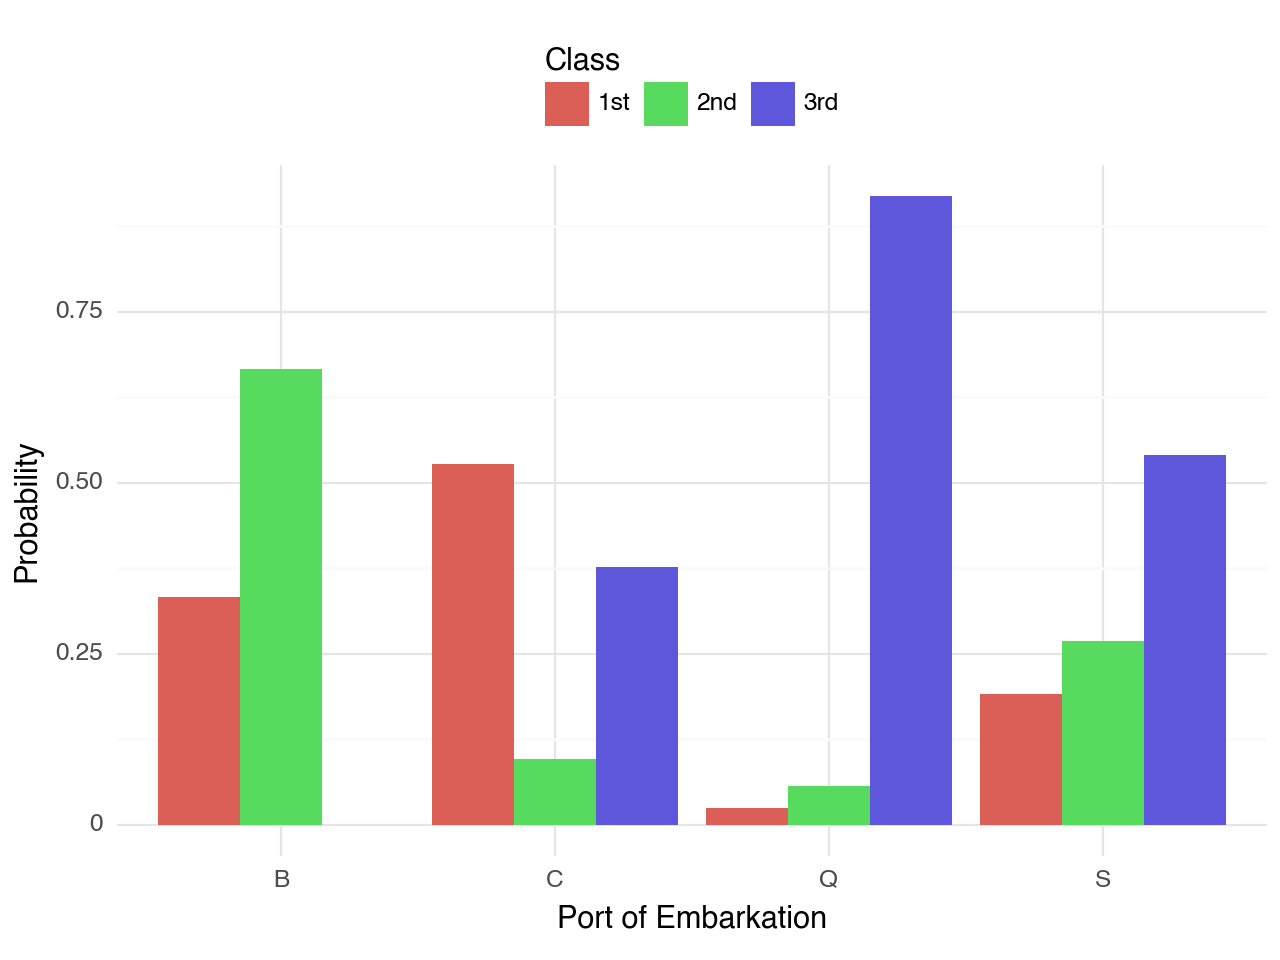

In [11]:
import pandas as pd
from plotnine import *

# Assuming you have the conditional distribution table in the 'conditional_dist' DataFrame

# Convert the conditional distribution DataFrame to a tidy format
tidy_conditional_dist = conditional_dist2.reset_index().melt(id_vars='class', var_name='embarked', value_name='Probability')

# Create the plot
plot = (
    ggplot(tidy_conditional_dist, aes(x='embarked', y='Probability', fill='class')) +
    geom_bar(stat='identity', position=position_dodge()) +
    labs(x='Port of Embarkment', y='Probability', fill='Class') +
    theme_minimal() +
    theme(legend_position='top')
)

# Display the plot
print(plot)

Pros: This plot makes it simpler to visualize the class distribution based on where the individual embarked by showing each point's probabilitity.
Cons: The visualization does not provide specific numeric values, making it harder to perform precise calculations.